In [1]:
#https://github.com/CShorten/KaggleDogBreedChallenge/blob/master/DogBreed_BinaryClassification.ipynb
import numpy as np
from keras.models import Sequential
from tensorflow.keras.datasets import mnist
from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from PIL import Image
import os
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
from keras.layers. normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
DIR = './train_imgs'

def get_size_statistics():
    heights = []
    widths = []
    img_count=0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        print(path)
        data = np.array(Image.open(path))
        heights.append(data.shape[0])
        widths.append(data.shape[1])
        img_count += 1

    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))



In [3]:
get_size_statistics()

./train_imgs\apple.jpg
./train_imgs\banana.jpg
./train_imgs\orange.jpg
Average Height: 737.3333333333334
Max Height: 1198
Min Height: 335


Average Width: 829.6666666666666
Max Width: 1360
Min Width: 450


In [4]:
def label_img(name):    
    word_label = name.split('.')[0]
    if word_label == 'apple': return np.array([1, 0, 0])
    elif word_label == 'orange' : return np.array([0, 1, 0])
    elif word_label == 'banana' : return np.array([0, 0, 1])

In [5]:
IMG_SIZE=28

def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        img = Image.open(path)
        #img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
            
    #shuffle(train_data)
    return train_data

In [6]:
train_data = load_training_data()
print(np.array([i[1] for i in train_data]))
#plt.imshow(train_data[0][0], cmap = 'gist_gray')
#plt.show()
#plt.imshow(train_data[1][0], cmap = 'gist_gray')
#plt.show()
#plt.imshow(train_data[2][0], cmap = 'gist_gray')
#plt.show()

[[1 0 0]
 [0 0 1]
 [0 1 0]]


In [7]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
trainLabels = np.array([i[1] for i in train_data])

In [26]:
model=Sequential()

print(trainImages.shape)

model=Sequential()

#model.add(Dense(3,activation='relu',input_shape=(784,)))
#model.add(Dense(3,activation='relu'))
#model.add(Dense(3, activation='softmax'))

model.add(Conv2D(32, input_shape=(IMG_SIZE,IMG_SIZE,3),kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Conv2D(64, input_shape=(IMG_SIZE,IMG_SIZE,3), kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), padding="same", activation="relu"))
#model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

(3, 28, 28, 3)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7,

Train on 2 samples, validate on 1 samples
Epoch 1/5
2/2 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 2/5
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 7.6646e-04 - val_accuracy: 1.0000
Epoch 3/5
2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.5671e-04 - val_accuracy: 1.0000
Epoch 4/5
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.8189e-04 - val_accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.8094e-04 - val_accuracy: 1.0000


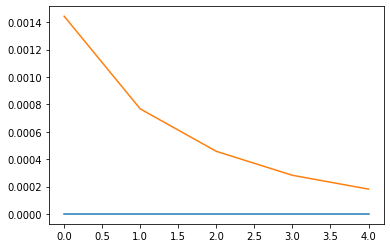

In [28]:
training=model.fit(trainImages, trainLabels, validation_split=.2, batch_size = 50, epochs = 5, verbose = 1)

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])

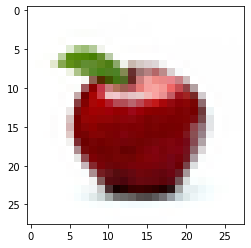

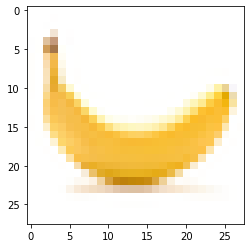

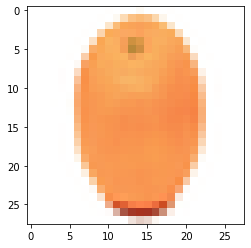

66.66666865348816
[1 2 1]
[[0.15125923 0.6989258  0.14981498]
 [0.01619509 0.04262964 0.9411753 ]
 [0.10786846 0.7600283  0.13210322]]


In [31]:
TEST_DIR = './test_img'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        img = Image.open(path)
        #img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img), label])
    return test_data

test_data=load_test_data()

plt.imshow(test_data[0][0], cmap = 'gist_gray')
plt.show()
plt.imshow(test_data[1][0], cmap = 'gist_gray')
plt.show()
plt.imshow(test_data[2][0], cmap = 'gist_gray')
plt.show()

testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

pred=model.predict_classes(testImages)
print(pred)

pred=model.predict(testImages)
print(pred)